### Principal Component Analysis (PCA), use the wine data file wine-labeled.csv for this assignment
____(a) Drop the “quality” column, which is a subjective label from wine tasters.____   

____Convert the Red/White column to a an array of 1’s and 0’s.____

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine-labeled.csv')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

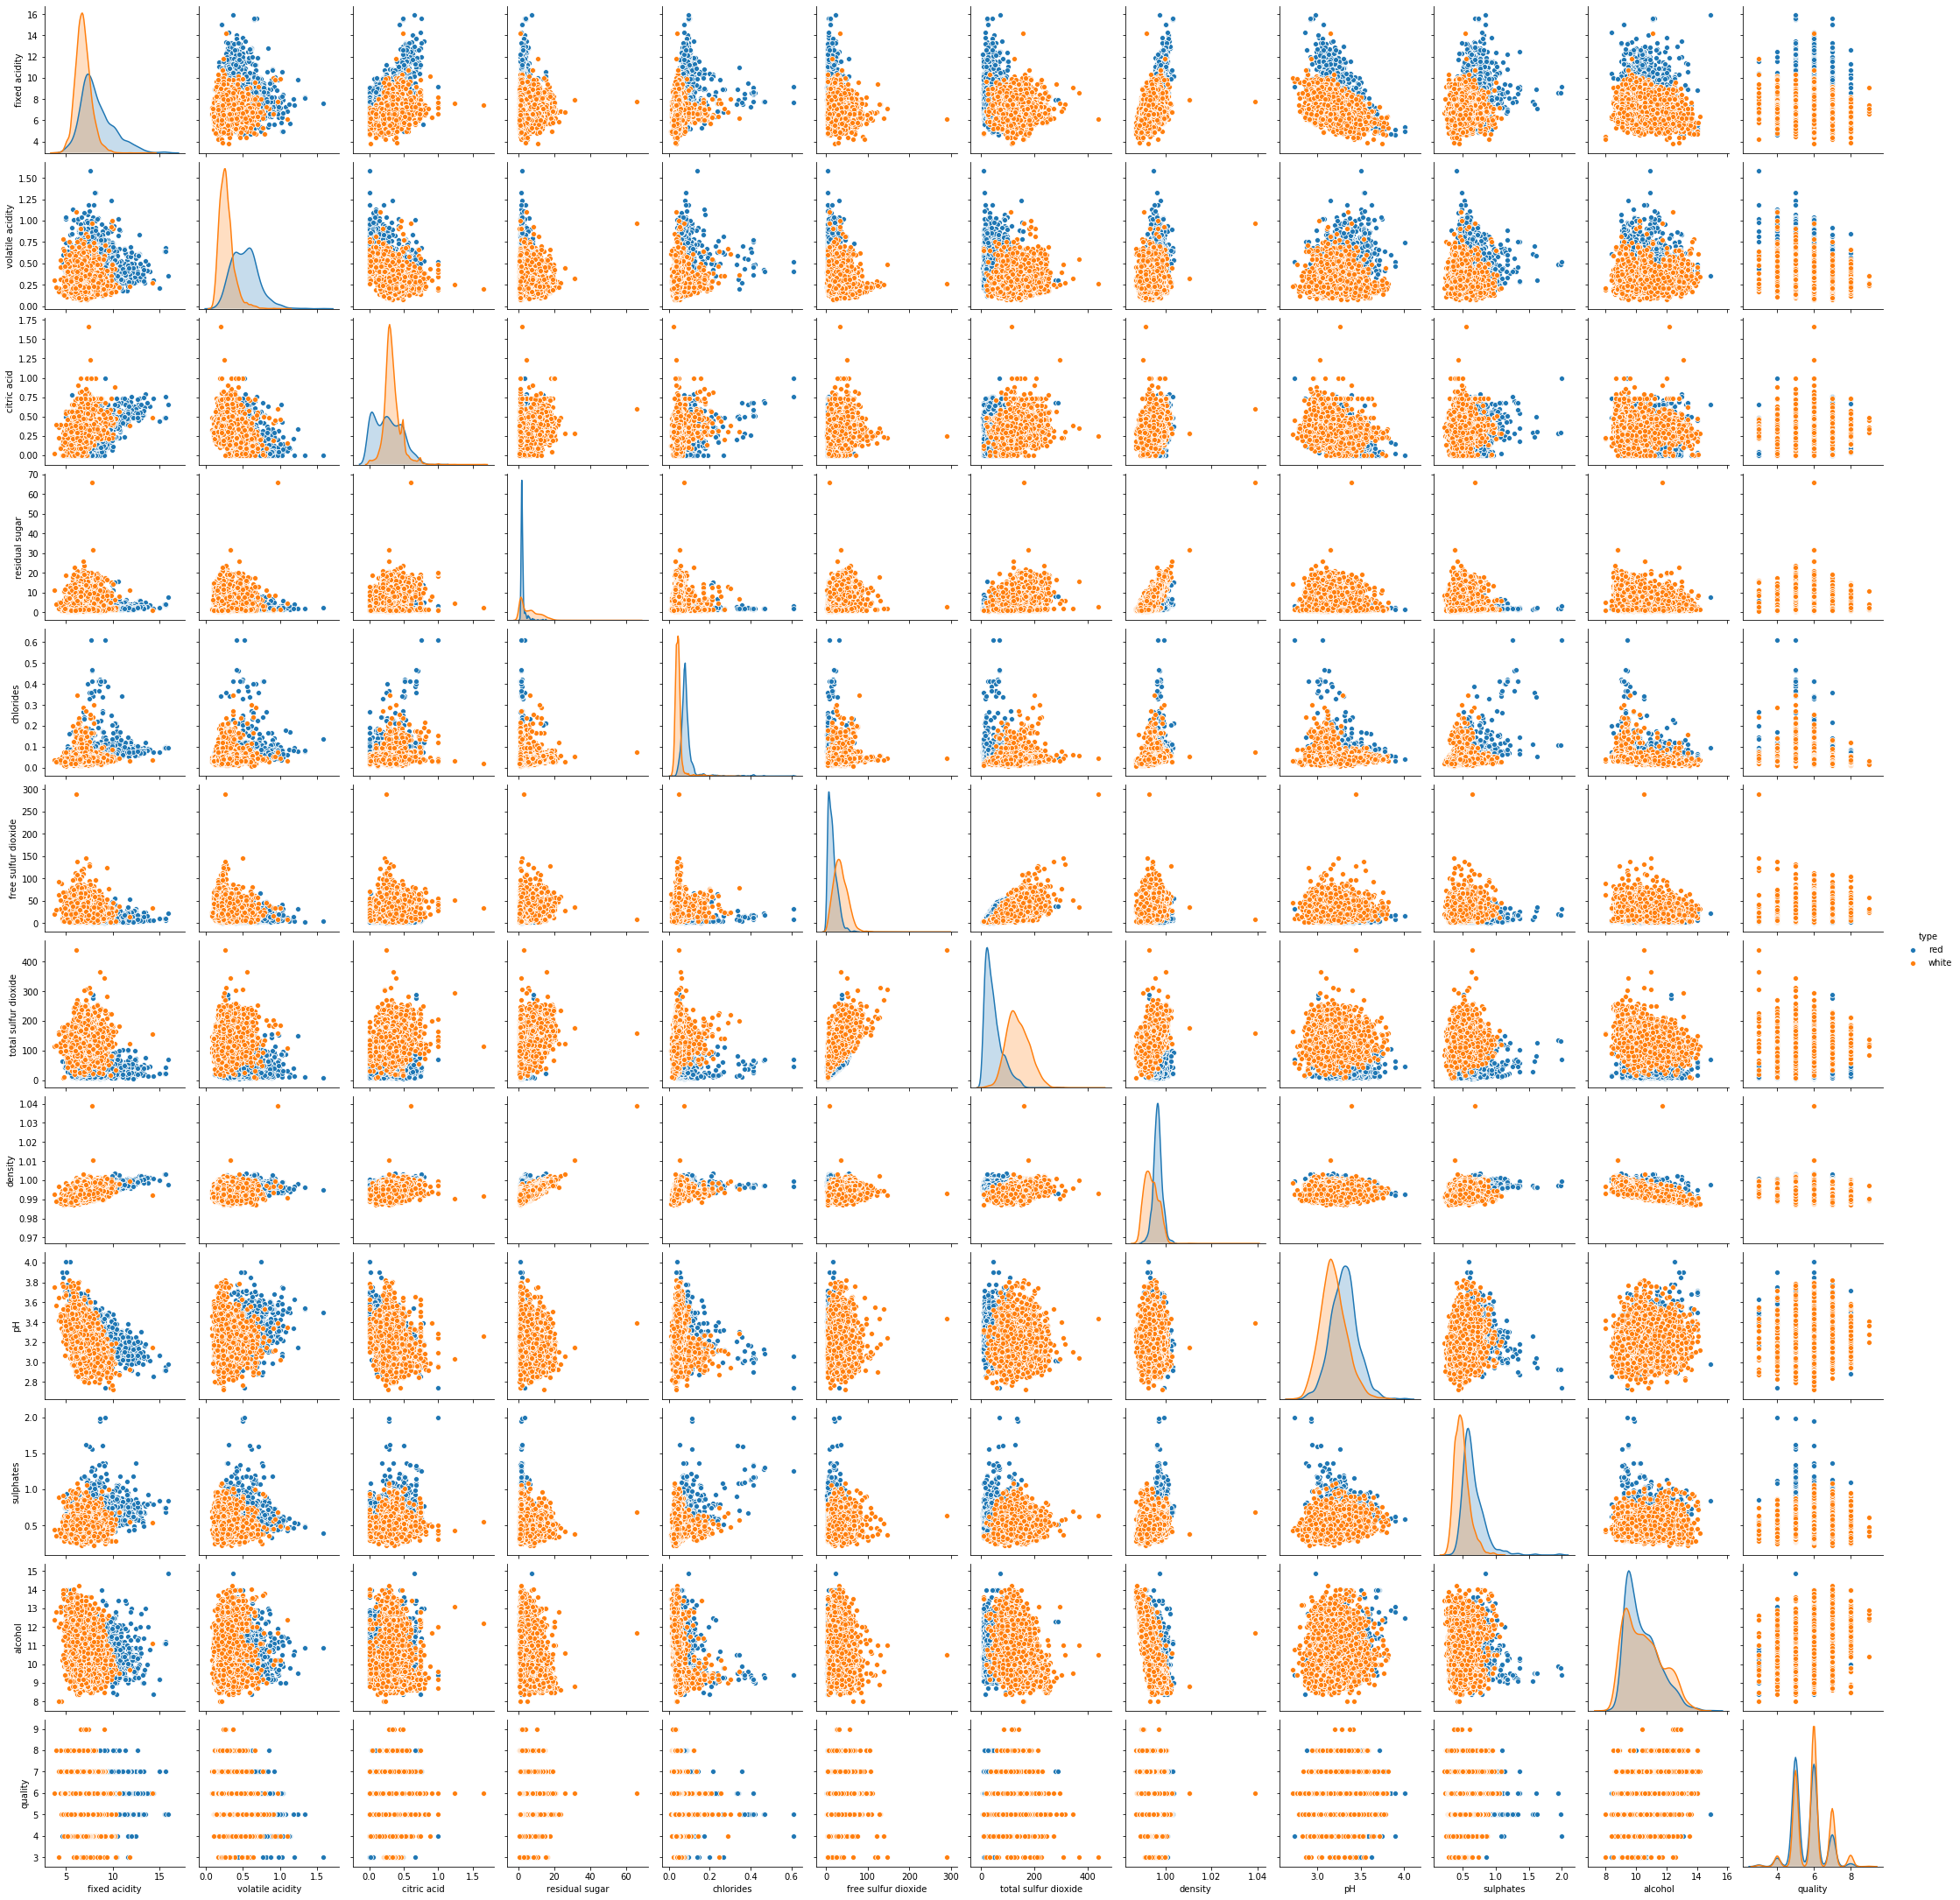

In [5]:
sns.pairplot(df, hue='type')

In [6]:
df.drop(labels=['quality'], axis=1, inplace=True)

In [7]:
df['type'] = df['type'].apply(lambda t: 1 if t == 'red' else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
df.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

___(b) Calculate the top 5 principal components and find the explained variance ratio.___

In [9]:
from sklearn.decomposition import PCA

features = df.columns.to_list()[:-1]
X = df[features]
pca_5 =  PCA(n_components=5)
pca_5.fit(X)

components, expl_var_ratio = pca_5.components_, pca_5.explained_variance_ratio_

Text(0.5, 1.0, 'Top 5 Components in the wine-labeled Dataset')

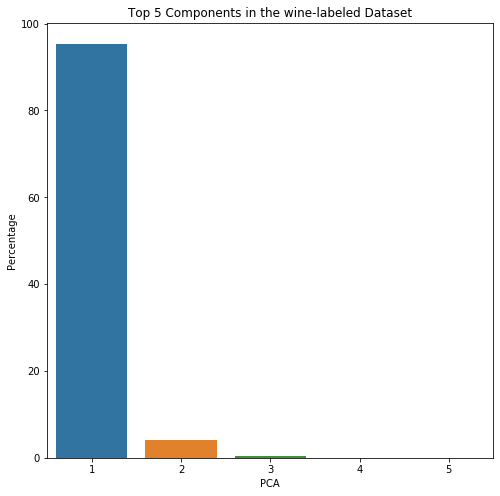

In [10]:
sns.barplot(np.arange(5) + 1, expl_var_ratio * 100)
plt.gcf().set_size_inches(8, 8)
plt.xlabel('PCA')
plt.ylabel('Percentage')
plt.title('Top 5 Components in the wine-labeled Dataset')

#### (c) Determine the top 2 principal components as a new array P

Text(0.5, 1.0, 'Top 2 Components in the wine-labeled Dataset')

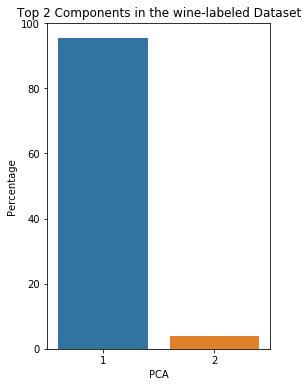

In [11]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)

components, expl_var_ratio = pca_2.components_, pca_2.explained_variance_ratio_

sns.barplot([1, 2], expl_var_ratio * 100)
plt.gcf().set_size_inches(4, 6)
plt.xlabel('PCA')
plt.ylabel('Percentage')
plt.title('Top 2 Components in the wine-labeled Dataset')

In [12]:
P = pca_2.transform(X)
P.shape

(6497, 2)

#### (d) Perform classification using your favorite method on P
We tested 5 algorithms: LogisticRegression, GaussianNB, KNeighborsClassifier, LinearDiscriminantAnalysis (LDA), QuadraticDiscriminantAnalysis(QDA).    
We plotted each ROC curve for those models and found that, the consistent top-3 perfomance were: 
1. LinearDiscriminantAnalysis with the area under curve of 0.952
2. LogisticRegression with the area under curve of 0.951
3. QuadraticDiscriminantAnalysis with the area under curve of 0.945

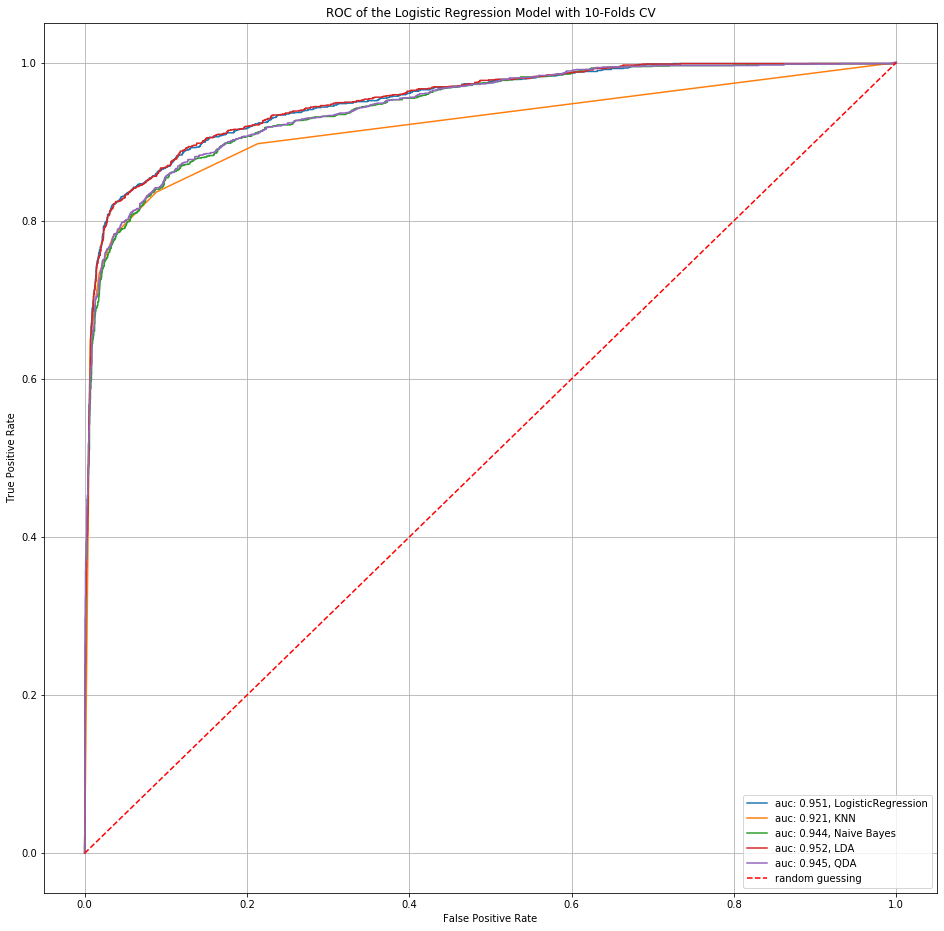

In [13]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Create a dictionary of models to test
models = {'LogisticRegression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Naive Bayes': GaussianNB(),
          'LDA': LDA(),
          'QDA': QDA()}

# Iterate through each model to train, predict, and plot the ROC curve
for name, model in models.items():
    # 10-fold cross validation and compute the probability of predictions for y
    y_predict_proba = CVP(model, P, df['type'], cv=10, 
                          method='predict_proba')
    # Plot the ROC curves
    fpr, tpr, _ = roc_curve(df['type'], y_predict_proba[:, 1])
    auc_score   = roc_auc_score(df['type'], y_predict_proba[:, 1])
    plt.plot(fpr, tpr, label='auc: {:.3f}, {}'.format(auc_score, name))
    
plt.gcf().set_size_inches(16, 16)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of 5 Models with 10-Folds Cross Validation')
plt.grid()
plt.legend(loc='lower right')
plt.show()